# **Project Name-**

# **IPL Analysis using PowerBI and EDA**

# **Project Summary-**

This project analyzes the Indian Premier League (IPL) by combining match-level metadata with ball-by-ball events to uncover how teams win, which players create the biggest impact, and how venues/toss conditions shape outcomes. The goal is to turn raw IPL data into clear, decision-ready insights that support selection, auction strategy, match tactics, coaching, and fan engagement.

# **Scope & Objectives**

1. **Identify top performers:** Consistent run scorers, power hitters, economy/strike bowlers, clutch fielders.

2. **Quantify match drivers:** Impact of toss (bat vs field), venue/city, and seasonal trends on outcomes and margins.

3. **Understand scoring patterns:** Runs per match, boundary rates (4s/6s), extras, wickets—overall and over time.

4. **Relate metrics to win modes**: How runs/fours/sixes/extras correlate with win by runs vs win by wickets

**Steps in conducting EDA analysis**

1.   **Understanding the Business Context -->** It's crucial to understand the business problem to ensure why data exists, what business questions need answers and how our analysis contributes to decision-making.
2.   **Data collection and cleaning -->** The analysis used two CSV files- matches.csv and deliveries.csv that contains season, city, date, innings, batting and bowling team information from IPL dataset. After merging two datasets on the basis of common column, data was cleaned by handling null values, duplicates and missing values.
3.   **Data Visualization -->** Represent the data in an intuitive visual format using box plot, histograms, bar plots, scatter plots, heatmap, pie charts, pair plot. This enhances data storytelling and insight presentation.
4.   **Key findings and interpretations -->** Drive the insights and interpretations based on every visualization to identify patterns and relationships.
5.   **Recommendations -->** At last provide the data-driven suggestions for business action.

# **GitHub Link -**
https://github.com/Drishanv/IPL-Dashboard-Analysis


# **Problem Statement — IPL Data Analysis**

## **Business Context**-

The Indian Premier League (IPL) generates rich, high-granularity data—match metadata and ball-by-ball events—that teams, coaches, analysts, and broadcasters can use to improve on-field decisions, recruitment, and storytelling. However, the data is noisy (naming inconsistencies, missing values) and spread across multiple tables, making it hard to quickly answer strategy-critical questions.

## **Objective**-

Conduct an end-to-end EDA that transforms raw IPL data into clear, decision-ready insights. Specifically, we will:

- Identify **top performers** among batters, bowlers, and fielders across seasons.
- Quantify the impact of **toss decisions** (bat vs field) on results overall and team/venue wise.
- Measure **venue effects** (city/stadium) on scoring rates and win modes.
- Track **seasonal trends** in runs, wickets, and boundary rates.
- Explore relationships between key variables (runs, fours, sixes, extras, run rate, margins).
- Produce **actionable recommendations** for selection, auctions, tactics, coaching, and fan engagement.

# **Data Wrangling**-

In [ ]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#fetch 1st dataset

matches = pd.read_csv('/content/Matches.csv')

In [ ]:
#fetch 2nd dataset

deliveries = pd.read_csv('/content/Deliveries.csv')

In [ ]:
#Showing cols of 1st dataset

matches.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [ ]:
#Showing cols of 2nd dataset

deliveries.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [ ]:
#Merge two datasets

data = pd.merge(deliveries, matches, left_on = 'match_id', right_on = 'id', how = 'left', suffixes = ('', '_match'))

In [ ]:
#Fetching merge dataset

data

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150455,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,2,Sachin Baby,CJ Jordan,B Kumar,0,...,normal,0,Sunrisers Hyderabad,8,0,BCJ Cutting,M Chinnaswamy Stadium,HDPK Dharmasena,BNJ Oxenford,NaN
150456,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,3,Sachin Baby,CJ Jordan,B Kumar,0,...,normal,0,Sunrisers Hyderabad,8,0,BCJ Cutting,M Chinnaswamy Stadium,HDPK Dharmasena,BNJ Oxenford,NaN
150457,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,4,Iqbal Abdulla,Sachin Baby,B Kumar,0,...,normal,0,Sunrisers Hyderabad,8,0,BCJ Cutting,M Chinnaswamy Stadium,HDPK Dharmasena,BNJ Oxenford,NaN
150458,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,5,Sachin Baby,Iqbal Abdulla,B Kumar,0,...,normal,0,Sunrisers Hyderabad,8,0,BCJ Cutting,M Chinnaswamy Stadium,HDPK Dharmasena,BNJ Oxenford,NaN


In [ ]:
#Checking the rows and columns count in the merged dataset

data.shape

(150460, 39)

In [ ]:
#Checking all columns in the merged dataset

data.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder', 'id', 'season', 'city', 'date', 'team1',
       'team2', 'toss_winner', 'toss_decision', 'result', 'dl_applied',
       'winner', 'win_by_runs', 'win_by_wickets', 'player_of_match', 'venue',
       'umpire1', 'umpire2', 'umpire3'],
      dtype='object')

In [ ]:
#Merged dataset info

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150460 entries, 0 to 150459
Data columns (total 39 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   match_id          150460 non-null  int64  
 1   inning            150460 non-null  int64  
 2   batting_team      150460 non-null  object 
 3   bowling_team      150460 non-null  object 
 4   over              150460 non-null  int64  
 5   ball              150460 non-null  int64  
 6   batsman           150460 non-null  object 
 7   non_striker       150460 non-null  object 
 8   bowler            150460 non-null  object 
 9   is_super_over     150460 non-null  int64  
 10  wide_runs         150460 non-null  int64  
 11  bye_runs          150460 non-null  int64  
 12  legbye_runs       150460 non-null  int64  
 13  noball_runs       150460 non-null  int64  
 14  penalty_runs      150460 non-null  int64  
 15  batsman_runs      150460 non-null  int64  
 16  extra_runs        15

# **Dataset Description**-

The dataset contains **Indian Premier League (IPL)** information at two levels:
1) **Match-level metadata** (one row per match)  
2) **Ball-by-ball events** (many rows per match)

For analysis and dashboards, these two sources can be **merged** into a single table using  
**`Matches.id` ↔ `Deliveries.match_id`**.

**Files**
- `Matches.csv` → Information about each IPL match (season, venue, toss, result, winner, margins).  
- `Deliveries.csv` → Ball-by-ball details for every match (batter, bowler, runs by type, extras, dismissal info).

## Dataset has the following columns

### Matches.csv (match-level)
- **id:** Unique identifier for each match  
- **season:** IPL season (year)  
- **city:** City where the match was played  
- **date:** Match date (YYYY-MM-DD)  
- **team1:** First team listed for the fixture  
- **team2:** Second team listed for the fixture  
- **toss_winner:** Team that won the toss  
- **toss_decision:** Decision after winning the toss (`bat` / `field`)  
- **result:** Match result type (e.g., `normal`, `tie`, `no result`)  
- **dl_applied:** Duckworth–Lewis applied flag (`1` if applied, else `0`)  
- **winner:** Team that won the match  
- **win_by_runs:** Margin of victory in runs (if defending)  
- **win_by_wickets:** Margin of victory in wickets (if chasing)  
- **player_of_match:** Player of the Match awardee  
- **venue:** Stadium name  
- **umpire1:** Name of first on-field umpire  
- **umpire2:** Name of second on-field umpire  
- **umpire3:** Third umpire (if recorded)

### Deliveries.csv (ball-by-ball)
- **match_id:** Match identifier (links to `Matches.id`)  
- **inning:** Inning number (`1` or `2`, Super Over may appear separately)  
- **batting_team:** Team batting on the ball  
- **bowling_team:** Team bowling on the ball  
- **over:** Over number within the inning  
- **ball:** Ball number within the over  
- **batsman:** Striker’s name  
- **non_striker:** Non-striker’s name  
- **bowler:** Bowler’s name  
- **is_super_over:** Flag for Super Over (`1`/`0`)  
- **wide_runs:** Runs from wides on the delivery  
- **bye_runs:** Runs from byes on the delivery  
- **legbye_runs:** Runs from leg-byes on the delivery  
- **noball_runs:** Runs from no-balls on the delivery  
- **penalty_runs:** Penalty runs awarded on the delivery  
- **batsman_runs:** Runs credited to the batter on the delivery  
- **extra_runs:** Total extras (wide + bye + leg-bye + no-ball + penalty)  
- **total_runs:** Total runs off the ball (batsman_runs + extra_runs)  
- **player_dismissed:** Name of dismissed player (if any)  
- **dismissal_kind:** Mode of dismissal (e.g., `caught`, `bowled`, `run out`)  
- **fielder:** Fielder involved in the dismissal (if any)

# **Data cleaning**

# **Handling missing or null values**-

In [ ]:
#checking null values in the merge dataset

data.isnull().sum()

,0
match_id,0
inning,0
batting_team,0
bowling_team,0
over,0
ball,0
batsman,0
non_striker,0
bowler,0
is_super_over,0


In [ ]:
#Replacing null values of city col with unknown

data['city'].fillna('unknown', inplace = True)

In [ ]:
#Winner → 'No Result' when result says so; else Unknown

data.loc[(data['result'].str.lower()=='no result') & (data['winner'].isna()), 'winner'] = 'No Result'
data['winner'].fillna('Unknown', inplace=True)

In [ ]:
#Player of the Match → No Award -- replacing the values

data['player_of_match'].fillna('No Award', inplace=True)

In [ ]:
#Replacing dismissal field col on non-wicket balls

data['player_dismissed'].fillna('Not Dismissed', inplace=True)
data['dismissal_kind'].fillna('not_out', inplace=True)
data['fielder'].fillna('None', inplace=True)

In [ ]:
#Handling umpires col

data['umpire1'].fillna('Unknown', inplace=True)
data['umpire2'].fillna('Unknown', inplace=True)
data['umpire3'].fillna('Not Recorded', inplace=True)

In [ ]:
#Check whether data is cleaned or not

data.isnull().sum()

,0
match_id,0
inning,0
batting_team,0
bowling_team,0
over,0
ball,0
batsman,0
non_striker,0
bowler,0
is_super_over,0


In [ ]:
#Checking the shape of the merge dataset after data cleaning process

data.shape

(150460, 39)

In [ ]:
#Numeric cols - fill with 0s and cast ints

numeric_cols = ['wide_runs', 'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs', 'batsman_runs', 'extra_runs', 'total_runs']
data[numeric_cols] = data[numeric_cols].fillna(0).astype(int)

In [ ]:
#Match margins

data['win_by_runs'].fillna(0, inplace=True)
data['win_by_wickets'].fillna(0, inplace=True)

# **Handling duplicate values**

In [ ]:
#Checking duplicate values

data.duplicated().sum()

np.int64(1)

We have 1 duplicate value in our dataset. So we will drop this duplicate values in order to avoid any data redundancy issues.

In [ ]:
#Dropping duplicate values

data.drop_duplicates(inplace = True)

In [ ]:
#Final check duplicate values

data.duplicated().sum()

np.int64(0)

In [ ]:
#Checking the data type of our dataset

data.dtypes

,0
match_id,int64
inning,int64
batting_team,object
bowling_team,object
over,int64
ball,int64
batsman,object
non_striker,object
bowler,object
is_super_over,int64


In [ ]:
#Checking the statistical description of our dataset

data.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,id,season,dl_applied,win_by_runs,win_by_wickets
count,150459.000000,150459.000000,150459.000000,150459.000000,150459.000000,150459.000000,150459.000000,150459.000000,150459.000000,150459.000000,150459.000000,150459.000000,150459.000000,150459.000000,150459.000000,150459.000000,150459.000000,150459.000000
mean,318.281964,1.482191,10.142690,3.616500,0.000538,0.037499,0.004885,0.022232,0.004340,0.000066,1.222446,0.069022,1.291468,318.281964,2012.482829,0.017819,13.808353,3.274759
std,182.955967,0.501768,5.674335,1.807691,0.023196,0.257398,0.114235,0.200105,0.072652,0.018229,1.594515,0.349668,1.583245,182.955967,2.762895,0.132293,23.673652,3.379309
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,161.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,161.000000,2010.000000,0.000000,0.000000,0.000000
50%,319.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,319.000000,2012.000000,0.000000,0.000000,3.000000
75%,476.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,476.000000,2015.000000,0.000000,20.000000,6.000000
max,636.000000,4.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,6.000000,7.000000,7.000000,636.000000,2017.000000,1.000000,146.000000,10.000000


As the dataset is cleaned and ready for further analysis. Let's recap what we did

**1. Data loading and merging:** Load the dataset into the environment and merged on the basis of one to many relationship using left join.

**2. Handling missing or null values:** Handle the missing or null values inside our dataset

*   Null values in 'player_dismissed', dismissal_kind and fielder has been replaced with not out, not dismissed and none.
*   Null values in 'city' is replaced with unknown as at some places city is not defined.
*   Null values in 'Winner' is replaced with 'no result' when result says no otherwise unknown.
*   Null values in 'player of the match' , 'umpire 1', 'umpire 2' and 'umpire 3' were replaced with their 'no award', 'unknown' and 'not recorded' respectively.

**3. Handling duplicate values:** Identified duplicate values and dropped it from the dataset

# **Data Visualization**

# **Statement 1 - How are matches decided most often as per season?**

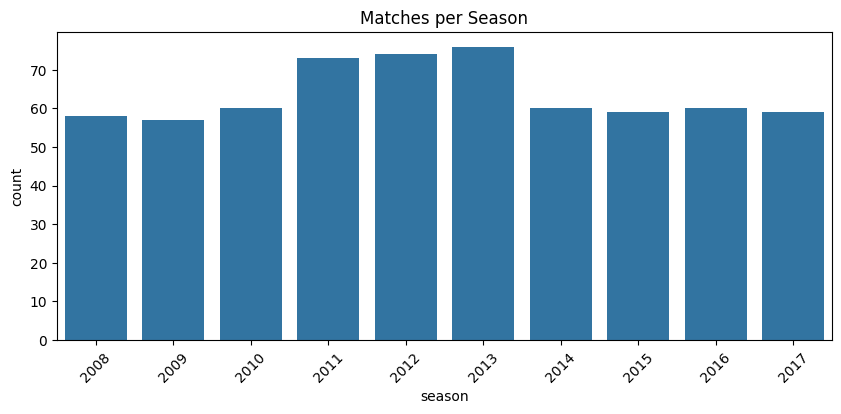

In [ ]:
plt.figure(figsize=(10,4))
sns.countplot(x="season", data=matches)
plt.title("Matches per Season")
plt.xticks(rotation=45)
plt.show()

# **Findings-**

1. There’s a clear increase from the inaugural seasons (2008–2010) to a peak around 2011–2013, indicating years with an expanded fixture list.

2. From 2014–2017 the count stabilizes at a similar level each year, suggesting a relatively fixed tournament format/number of games.

# **Statement 2- Knowing the Toss Decision Distribution**

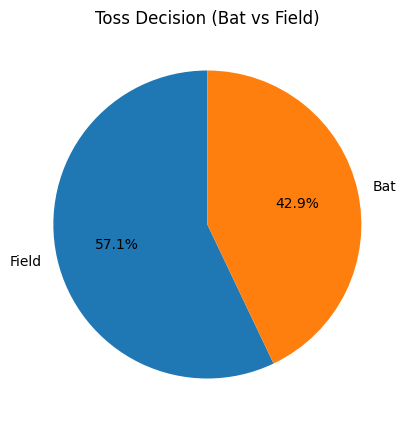

In [ ]:
tc = matches["toss_decision"].str.title().value_counts()
plt.figure(figsize=(5,5))
plt.pie(tc.values, labels=tc.index, autopct="%1.1f%%", startangle=90)
plt.title("Toss Decision (Bat vs Field)")
plt.show()

# **Findings-**

1. Teams prefer to field first (~57%) after winning the toss, indicating a general chasing bias—often linked to dew and clearer targets.

2. Bat first (~43%) remains a substantial share, suggesting venue- or lineup-specific strategies (e.g., slow pitches where runs on the board matter).

# **Statement 3- Which venues/cities host the most matches?(Top 5)**

---



In [ ]:
# Which venues/cities host the most matches?(Top 5)
top_venues = matches['venue'].value_counts().head(5)
top_cities = matches['city'].value_counts().head(5)

print("Top 5 Venues:")
print(top_venues)
print("\nTop 5 Cities:")
print(top_cities)

Top 5 Venues:
venue
M Chinnaswamy Stadium                        66
Eden Gardens                                 61
Feroz Shah Kotla                             60
Wankhede Stadium                             57
Rajiv Gandhi International Stadium, Uppal    49
Name: count, dtype: int64

Top 5 Cities:
city
Mumbai       85
Bangalore    66
Kolkata      61
Delhi        60
Hyderabad    49
Name: count, dtype: int64


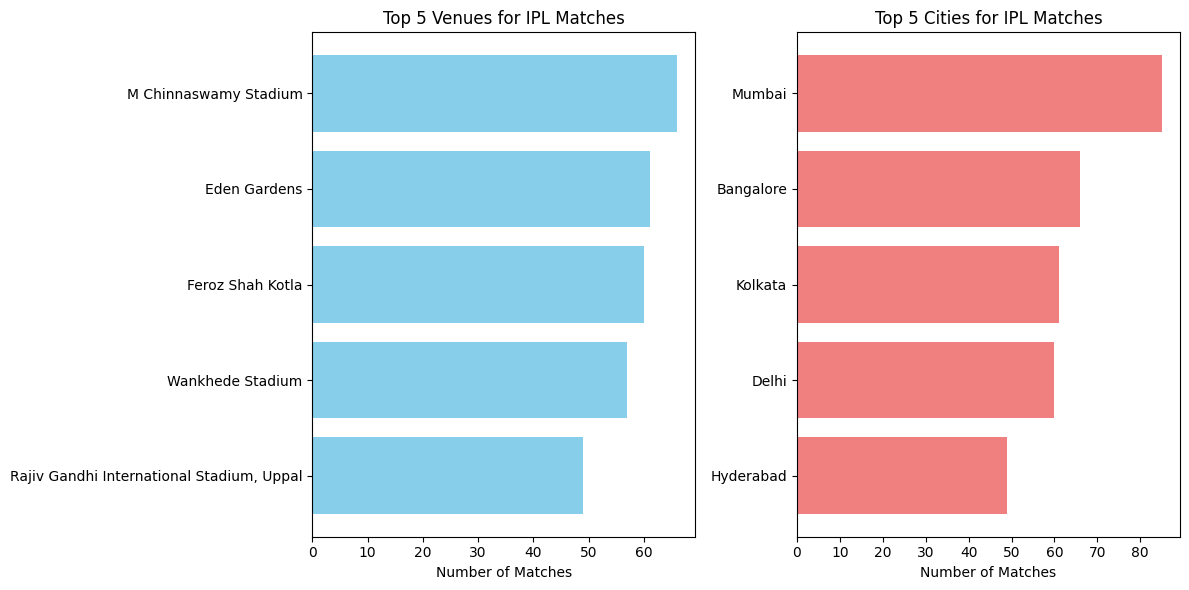

In [ ]:
#Now plot it

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1) # 1 row, 2 columns, 1st plot
plt.barh(top_venues.index, top_venues.values, color='skyblue')
plt.xlabel('Number of Matches')
plt.title('Top 5 Venues for IPL Matches')
plt.gca().invert_yaxis() # Invert y-axis to show the highest value at the top

plt.subplot(1, 2, 2) # 1 row, 2 columns, 2nd plot
plt.barh(top_cities.index, top_cities.values, color='lightcoral')
plt.xlabel('Number of Matches')
plt.title('Top 5 Cities for IPL Matches')
plt.gca().invert_yaxis() # Invert y-axis to show the highest value at the top

plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

# **Findings-**

1. **Cities:** Mumbai is the leading host (~85 matches), followed by Bengaluru, then Kolkata and Delhi, with Hyderabad fifth—showing fixtures are concentrated in major metros.

2. **Venues:** M. Chinnaswamy Stadium hosts the most games among single stadiums, narrowly ahead of Eden Gardens and Feroz Shah Kotla; Wankhede and Rajiv Gandhi, Uppal follow—top venues are fairly close in volume.

# **Statement 4- Distribution of win by runs scored**

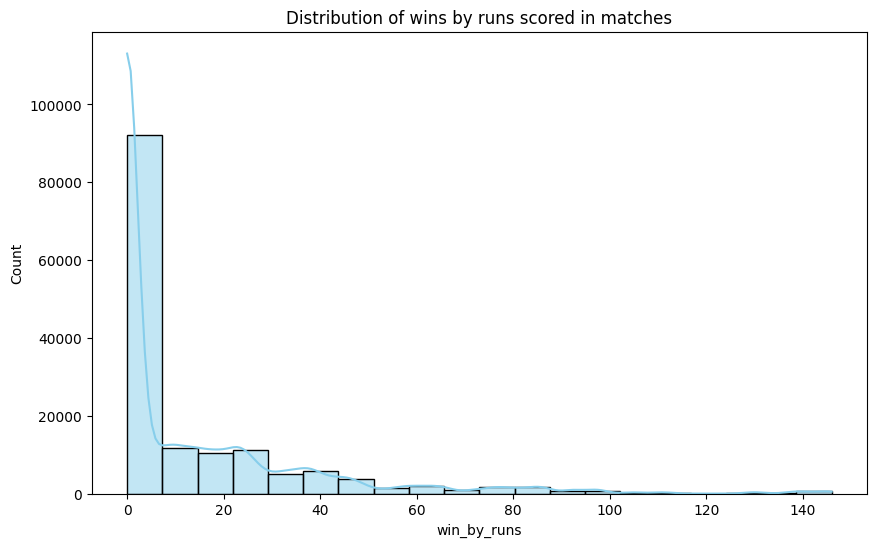

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data['win_by_runs'], bins=20, kde=True, color='skyblue')
plt.title("Distribution of wins by runs scored in matches")
plt.show()

# **Findings-**

1. The distribution is strongly right-skewed: most defenses are won by small margins (≈1–20 runs), indicating many close finishes when teams defend totals.

2. A long right tail extends to 80–150+ runs, but these are rare blowouts—usually when pitches are bowler-friendly or the chasing side collapses.

# **Statement 5- Distribution of win by wickets taken**

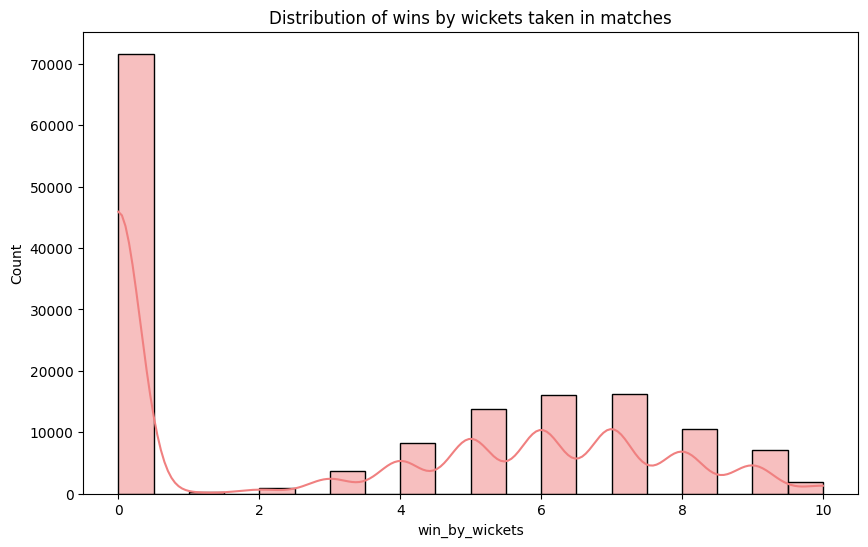

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data['win_by_wickets'], bins=20, kde=True, color='lightcoral')
plt.title("Distribution of wins by wickets taken in matches")
plt.show()

# **Findings-**

1. The huge spike at 0 reflects all matches won by runs (i.e., not chases), so only the right side (>0) represents successful chases.

2. Among chases, margins cluster around 6–8 wickets, indicating many comfortable pursuits once the chase is on track.

3. Tight chases (1–3 wickets) are relatively less frequent, and 10-wicket wins are rare—suggesting that when chasing teams control the innings early, they usually finish with plenty in hand.

# **Statement 6- Average runs scored in matched based on season**

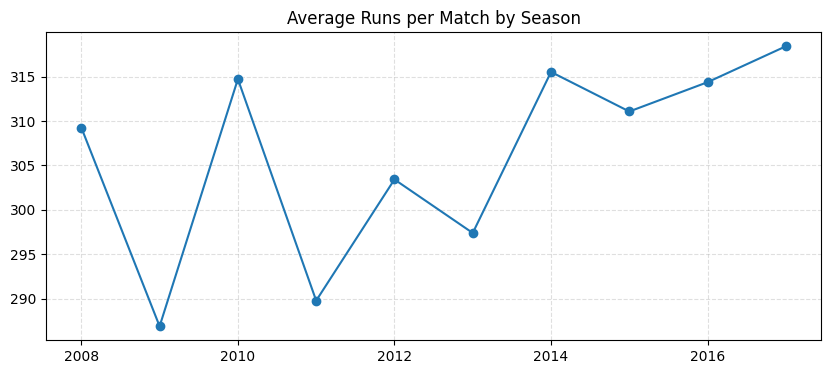

In [ ]:
mt = deliveries.groupby("match_id")["total_runs"].sum().reset_index()
mt = mt.merge(matches[["id","season"]], left_on="match_id", right_on="id", how="left")
season_rr = mt.groupby("season")["total_runs"].mean().sort_index()

plt.figure(figsize=(10,4))
plt.plot(season_rr.index, season_rr.values, marker="o")
plt.grid(ls="--", alpha=0.4)
plt.title("Average Runs per Match by Season")
plt.show()

# **Findings-**

1. Despite year-to-year fluctuations, there’s a gentle upward trend from ~290 (early seasons) to ~318 by 2017, pointing to a more batting-friendly league over time.

2. Dips around 2009 and 2011 suggest seasons/venues that suppressed scoring, while peaks in 2010 and 2014–2017 reflect growing power-hitting depth and improved chasing.

# **Statement 7- Average Wickets taken in matches based on season**

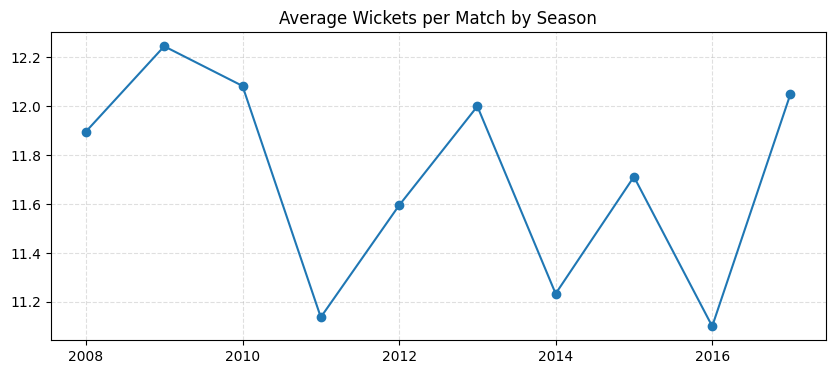

In [ ]:
wk = deliveries[deliveries["player_dismissed"].notna()].groupby("match_id").size().rename("wkts").reset_index()
wk = wk.merge(matches[["id","season"]], left_on="match_id", right_on="id", how="left")
season_w = wk.groupby("season")["wkts"].mean().sort_index()

plt.figure(figsize=(10,4))
plt.plot(season_w.index, season_w.values, marker="o")
plt.grid(ls="--", alpha=0.4)
plt.title("Average Wickets per Match by Season")
plt.show()

# **Findings-**

1. The line is remarkably stable around ~11–12 wickets per match, indicating that wicket-taking volume hasn’t shifted much across seasons.

2. Small oscillations appear—peaks near 2009/2013/2017 (~12.0–12.3) and dips around 2011/2016 (~11.0–11.1)—likely reflecting venue mixes, pitch prep, or rule tweaks.

3. Paired with rising runs (your earlier chart), this suggests batting has improved without a big drop in wickets, so attack options in the middle/death overs remain crucial every season.

# **Statement 8- Top 10 run scorers across all seasons**

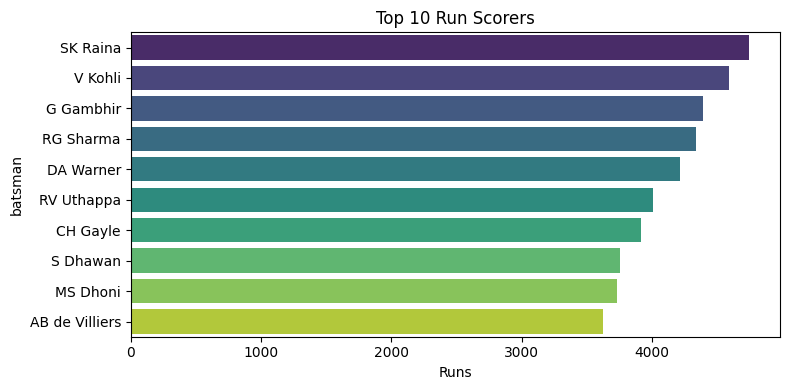

In [ ]:
top_scorers = data.groupby('batsman')['total_runs'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(8,4))
sns.barplot(x=top_scorers.values, y=top_scorers.index, palette='viridis')
plt.title('Top 10 Run Scorers')
plt.xlabel('Runs')
plt.tight_layout()
plt.show()

# **Findings-**

1. Suresh Raina leads total runs, with Virat Kohli close behind; Gautam Gambhir and Rohit Sharma also cross the high-volume mark—showing longevity and consistency across many seasons.

2. The list is top-order heavy (Raina, Kohli, Gambhir, Rohit, Warner, Dhawan, Uthappa) who face more balls; finishers/power-hitters like MS Dhoni, Chris Gayle, AB de Villiers appear with slightly lower totals due to role/matches but high impact per inning.

# **Statement 9- Top 10 wicket takers across all seasons**

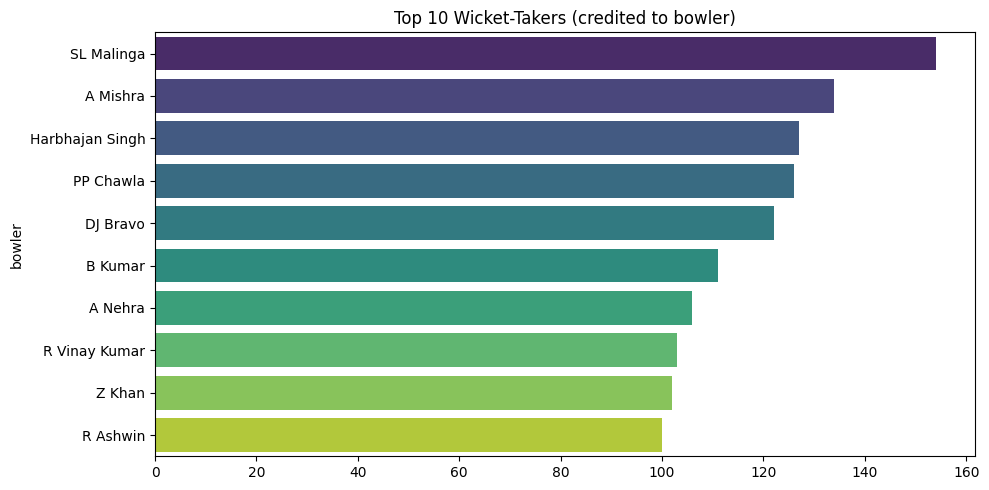

In [ ]:
wkinds = {"bowled","caught","lbw","stumped","hit wicket","caught and bowled","caught & bowled"}
bowler_wk = deliveries[deliveries["dismissal_kind"].str.lower().isin(wkinds)].groupby("bowler").size().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(y=bowler_wk.index, x=bowler_wk.values, orient="h", palette = "viridis")
plt.title("Top 10 Wicket-Takers (credited to bowler)"); plt.tight_layout(); plt.show()


# **Findings-**

1. Lasith Malinga leads by a clear margin (~155), reflecting elite death-over yorkers and long IPL tenure; Amit Mishra/Harbhajan/Chawla anchor a strong spin contingent near the top.

2. The list shows a balanced mix of pace and spin (Malinga, Bravo, B. Kumar, Nehra, Zaheer vs Mishra, Harbhajan, Chawla, Ashwin), indicating multiple successful bowling styles in IPL conditions.

# **Statement 10- Knowing the Top Players by Sixes & Fours**

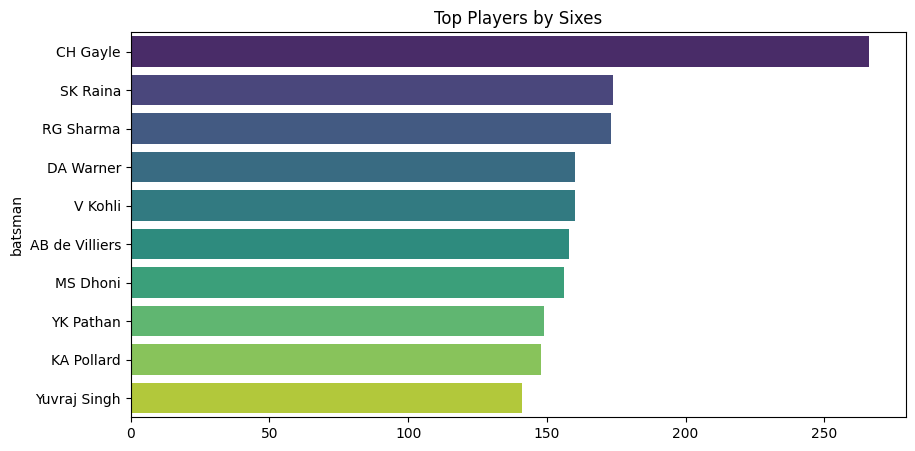

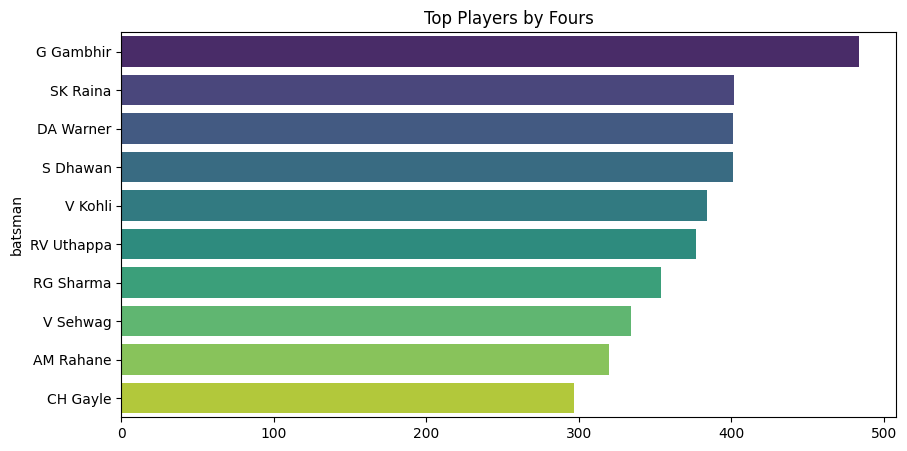

In [ ]:
# Sixes
sx = deliveries[deliveries['batsman_runs'] == 6].groupby("batsman").size().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(y=sx.index, x=sx.values, orient="h", palette = "viridis")
plt.title("Top Players by Sixes")
plt.show()

# Fours
fr = deliveries[deliveries['batsman_runs'] == 4].groupby("batsman").size().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(y=fr.index, x=fr.values, orient="h", palette = "viridis")
plt.title("Top Players by Fours")
plt.show()

# **Findings-**

1. **Sixes**: Chris Gayle dominates by a wide margin, with Raina and Rohit next; list also features finishers (Dhoni, Pollard, Yuvraj) → clear power-hitter profile.

2. **Fours:** Gautam Gambhir leads, followed by Raina, Warner, Dhawan, Kohli—mostly top-order openers/anchors who score heavily through placement.

# **Statement 11- Comparison of bowler economy vs strike rate**

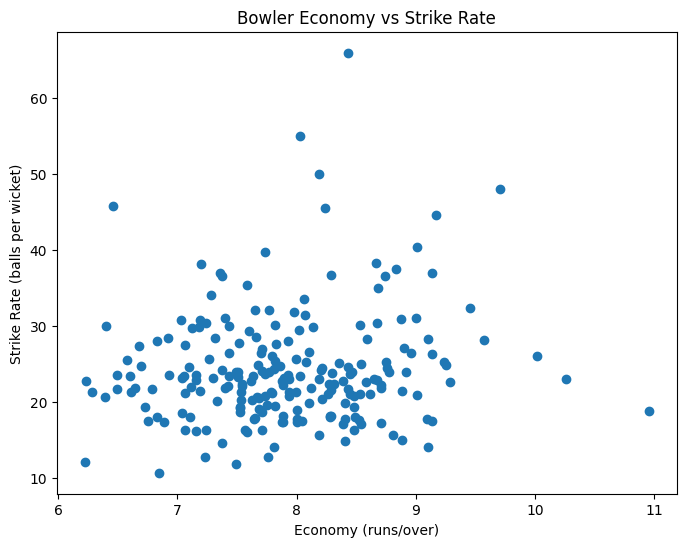

In [ ]:
wkinds = {"bowled","caught","lbw","stumped","hit wicket","caught and bowled","caught & bowled"}

bowl = deliveries.groupby("bowler").agg(
    legal_balls=("ball", lambda x: (x > 0).sum()),  # Assuming ball number > 0 indicates a delivery
    runs_conceded=("total_runs","sum")
).reset_index()

w = deliveries[deliveries["dismissal_kind"].str.lower().isin(wkinds)].groupby("bowler").size().rename("wickets").reset_index()

bowl = bowl.merge(w, on="bowler", how="left").fillna({"wickets":0})

bowl["overs"] = bowl["legal_balls"]/6.0
bowl = bowl[bowl["overs"]>=20]  # workload filter
bowl["economy"] = bowl["runs_conceded"]/bowl["overs"]
bowl["strike_rate"] = np.where(bowl["wickets"]>0, bowl["legal_balls"]/bowl["wickets"], np.nan)

plt.figure(figsize=(8,6))
plt.scatter(bowl["economy"], bowl["strike_rate"])
plt.title("Bowler Economy vs Strike Rate")
plt.xlabel("Economy (runs/over)")
plt.ylabel("Strike Rate (balls per wicket)")
plt.show()

# **Findings-**

1. Most bowlers cluster around 7–9 economy and 18–25 balls/wicket, which looks like the IPL “typical” range.

2. The best all-rounders sit bottom-left (low economy and low strike rate) — they concede fewer runs and take wickets quickly.

# **Statement 12- Relationship between match level metrics**

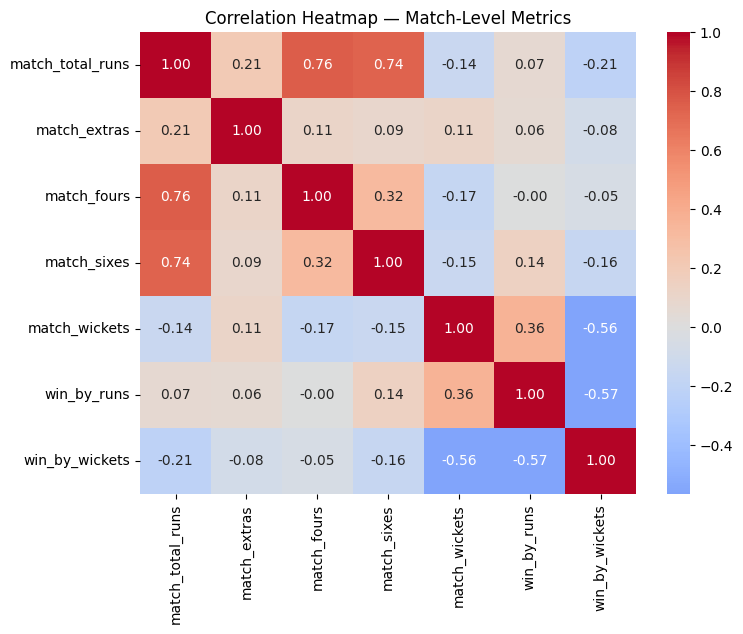

In [ ]:
m = deliveries.groupby("match_id").agg(
    match_total_runs=("total_runs","sum"),
    match_extras=("extra_runs","sum"),
    match_fours=("batsman_runs", lambda x: (x == 4).sum()),
    match_sixes=("batsman_runs", lambda x: (x == 6).sum())
).reset_index()
wk = deliveries[deliveries["player_dismissed"].notna()].groupby("match_id").size().rename("match_wickets").reset_index()
m = m.merge(wk, on="match_id", how="left").fillna({"match_wickets":0})
m = m.merge(matches[["id","win_by_runs","win_by_wickets"]], left_on="match_id", right_on="id", how="left")

corr = m[["match_total_runs","match_extras","match_fours","match_sixes","match_wickets","win_by_runs","win_by_wickets"]].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Correlation Heatmap — Match-Level Metrics")
plt.show()

# **Findings-**

**1. Strong positive correlations**

-- Match total runs ↔ Match fours: ~+0.76 → more fours drive higher team totals.

-- Match total runs ↔ Match sixes: ~+0.74 → six-hitting also strongly lifts totals.

**2. Strong negative correlations**

-- Win by runs ↔ Win by wickets: ~−0.57 → teams win either by runs or by wickets, not both.

-- Match wickets ↔ Win by wickets: ~−0.56 → more wickets falling tends to hurt chases (fewer wickets in hand at the end).

# **Statement 13- Team wins per season**



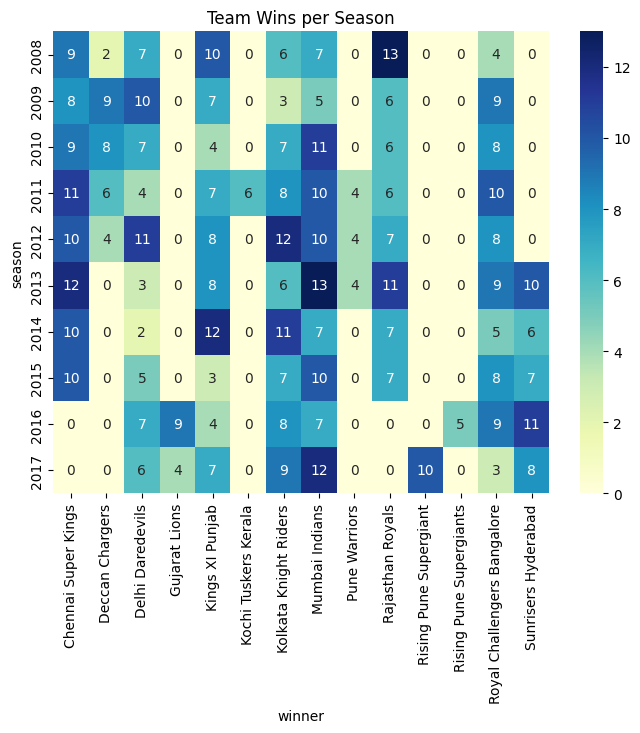

In [ ]:
#team wins per season using correlation

season_team = matches.pivot_table(index='season', columns='winner', values='id', aggfunc='count').fillna(0)
plt.figure(figsize=(8,6))
sns.heatmap(season_team, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Team Wins per Season")
plt.show()

# **Findings-**

1. **Perennial contenders:** Darker bands repeat for Mumbai Indians, Chennai Super Kings, and Kolkata Knight Riders, showing high win counts across multiple seasons; they dominate the grid more consistently than most others.

2. **Era/transition teams:** You can see franchise changes clearly—Deccan Chargers active early then replaced by Sunrisers Hyderabad (who pick up in later seasons); short-lived teams like Kochi Tuskers Kerala, Pune Warriors, Gujarat Lions, Rising Pune Supergiant appear only in their specific years.

3. **Competitive spikes:** Several teams have seasonal surges (e.g., KKR around 2012/2014, MI in multiple years, SRH in later years), indicating that while a few teams are consistent, year-to-year form swings create competitive balance.

# **Statement 14- Batting Metrics**

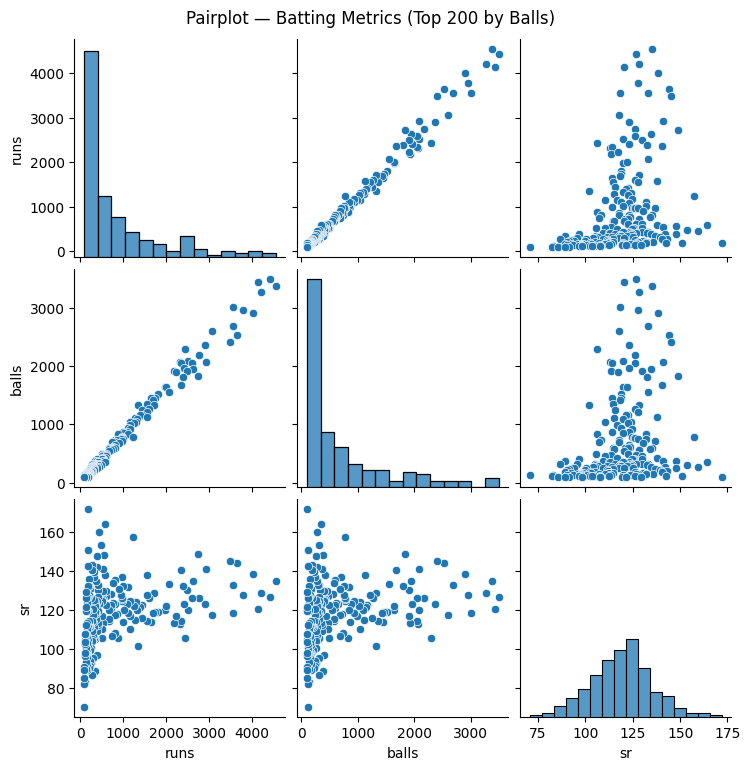

In [ ]:
bat = deliveries.groupby('batsman').agg(
    runs=('batsman_runs', 'sum'),
    balls=('ball', 'count') # Assuming each row in deliveries is a ball faced by the batsman
).reset_index()

bat['sr'] = (bat['runs'] / bat['balls']) * 100

sample = bat.sort_values("balls", ascending=False).head(200)[["runs","balls","sr"]].dropna()
sns.pairplot(sample)
plt.suptitle("Pairplot — Batting Metrics (Top 200 by Balls)", y=1.02); plt.show()

# **Findings-**

1. **Runs vs Balls:** Strong positive line—batters who face more balls score more runs (volume effect).

2. **Strike Rate (SR):** Most players cluster around 110–130 SR; SR doesn’t rise much with more balls (weak link).

3. **Outliers:** A few batters show very high SR at lower balls (finishers), while some high-run scorers have moderate SR (anchors).

# **Conclusion-**

This EDA analyses concludes the following insights

1. Seasons grew early and then stabilized—fixture count is fairly steady in recent years.

2. Teams prefer to field first (chase), so conditions/visibility and target clarity matter.

3. Wins by runs are mostly small margins (1–20); very big run wins are rare.

4. Successful chases are usually comfortable (6–8 wickets in hand); last-over, 1–3-wicket finishes are less common.

5. Average runs per match have drifted upward across seasons → batting is stronger/more aggressive.

6. A handful of cities/grounds (e.g., Mumbai, Bengaluru; Chinnaswamy, Eden Gardens…) host a big share of games—ground effects matter.

7. Both pace and spin succeed. Best overall bowlers sit low economy + low strike rate; others specialize (control vs strike).

8. MI, CSK, KKR show consistent high-win seasons; others have spikes or short franchise windows.

# **Recommendations-**

1. Since most run-defences are tight, attack the middle/death overs—use wicket-taking options (pace-off, cutters, leg-spin, yorkers) to avoid easy chases.

2. Preserve wickets early, then accelerate—this mirrors the frequent 6–8 wicket chase wins you observed.

3. Maintain ground-specific plans (par score, preferred lengths, field sets). Carry an extra spinner for slow/turning pitches and an extra pacer for high-carry venues.

4. Build a balanced XI—anchors (volume runs) + finishers (high SR) + control bowlers (low econ) + strike bowlers (low SR). Recruit individual players based on role at different match phases.

5. Track over-by-over run rate & dismissal rate; schedule your best control bowlers in overs with historically high leak, and strike bowlers where wickets fall most.

6. Target finishers with high SR in fewer balls and bowlers less than 7.5 economy or less than 18 balls/wicket—those profiles lift T20 win probability.

7. Monitor economy/strike-rate trends to rotate bowlers before drop-offs; give role-specific coaching (death yorkers, PP swing, middle-over spin).

8. Team mentors must pick and train batters to lift boundary% (fours + sixes). Boundary hitters move team totals far more than extras.